In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [60]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [61]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.shape

(10000, 14)

In [63]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [68]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [69]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [70]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

ohe on gender and geography

In [71]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [72]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [73]:

from sklearn.model_selection import train_test_split

In [74]:
X=df.drop('Exited', axis=1)

In [75]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [76]:
y=df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
ss=StandardScaler()

In [80]:
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.fit_transform(X_test)


In [81]:
X_train_sc

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense #to  create dense layer

In [84]:
#pahle model obj banao
# fir layers add kro

In [85]:
model=Sequential()

#hidden layer-
model.add(Dense(3, activation='sigmoid', input_dim=11))
#3- no. of nodes
# input_dim= feauters

#o/p layer-
model.add(Dense(1, activation='sigmoid'))


In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


model compilation stage me kuch cheeze batate ho ex- konsa loss function use kroge, konsa optimizer use kroge gradient descent k liye

In [87]:
model.compile(loss='binary_crossentropy', optimizer='Adam'  )

In [88]:
model.fit(X_train_sc, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5518
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4683
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4561
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4485
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4391
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4361
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4337
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4320


In [89]:
#hmara model  train ho chuka he ex- weights n biases calculate ho chuke he

**Calculated weights and biases of 1st layer:-**

In [90]:
model.layers[0].get_weights()

[array([[-3.6989573e-01,  3.2063904e-01, -2.3468977e-02],
        [-1.3808548e+00, -1.1959831e+00, -1.7011180e+00],
        [ 3.1632963e-01, -4.0200975e-02, -1.6851587e-02],
        [-1.0473540e-01, -3.1435764e-01, -3.7080884e-01],
        [-6.2535167e-02,  8.1466034e-02,  1.0267269e-01],
        [ 4.1300276e-01,  1.2069819e-01, -1.1823383e-01],
        [ 4.9632007e-01,  9.0757734e-01,  6.2908232e-01],
        [ 1.3995414e-03,  1.8763761e-01, -2.3808245e-01],
        [-5.8655965e-01, -4.1504627e-01, -6.8419796e-01],
        [ 3.1871206e-01,  1.7042832e-02, -1.2270806e-01],
        [ 6.2954777e-01,  2.6180083e-01,  6.2578452e-01]], dtype=float32),
 array([-0.06781002,  0.2784144 ,  0.28294003], dtype=float32)]

**Calculated weights and biases of 2nd layer:-**

In [91]:
model.layers[1].get_weights()

[array([[-0.4128801],
        [-1.1316926],
        [-1.2410488]], dtype=float32),
 array([-0.10429047], dtype=float32)]

**Predictions:**

In [92]:
model.predict(X_test_sc) # will o/p in range(0,1) since sigmoid is used

63/63 [==============================] - 0s 1ms/step


array([[0.10831577],
       [0.13407029],
       [0.1355365 ],
       ...,
       [0.06295395],
       [0.13989468],
       [0.36755875]], dtype=float32)

ab isko categories me convert krne  liye we need a threshold(ex- 0.5(say) )

But to decide the good threshold we plot curves like- ROC, AOC, AUC curves(filhaal 0.5 se kaam chala lete he)

In [93]:
y_log=model.predict(X_test_sc)

63/63 [==============================] - 0s 1ms/step


In [94]:
y_pred=np.where(y_log>0.5,1,0)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7925

# **Chalo layers, nodes, activation funcs chnage krke dekhte he-**

In [96]:
#zada layers se overfitting hone lgta he

In [97]:
model=Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [98]:
# training accuracy ~ 87%, val_accuracy ~ 81% here => thoda overfitting he isme

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [101]:
history=model.fit(X_train_sc, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.7778 - val_loss: 0.4711 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.8092 - val_loss: 0.4344 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8166 - val_loss: 0.4149 - val_accuracy: 0.8163
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8264 - val_loss: 0.3964 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8402 - val_loss: 0.3796 - val_accuracy: 0.8431
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8469 - val_loss: 0.3688 - val_accuracy: 0.8475
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8525 - val_loss: 0.3620 - val_accuracy: 0.8456

In [102]:
# jo trainig ho rhi he uska loss, jo trainig ho rhi he uski accuracy, validation set ka loss(20%wala, abhi jo liya that is being use for validation on each epoch, val set ki accuracy) 

In [103]:
history #is a History object

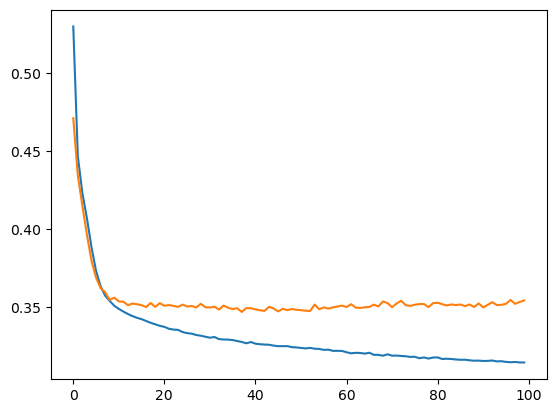

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [105]:
#ye gap graph me kitna zada overfitting hui he, show krta he; use regularization or dropout concepts to handle this

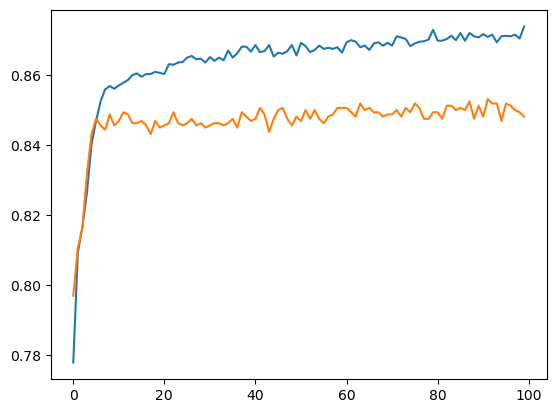

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [107]:
y_log=model.predict(X_test_sc)

63/63 [==============================] - 0s 1ms/step


In [108]:
y_pred=np.where(y_log>0.5,1,0)

In [109]:
accuracy_score(y_test, y_pred)

0.8565